# Análise de Portfólio de Ativos
Análise exploratória e indicadores de retorno, risco e performance de um portfólio de ativos financeiros.

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr
import plotly
import plotly.offline as plo
import plotly.graph_objs as plg
import plotly.express as plx
from scipy.stats import norm

### Funções de Configurações Gráficas
Funções para configurações base de gráficos e exibição.

In [2]:
def Plot_Formato(fig, title):
    title={'text': title, 'xanchor': 'center', 'yanchor': 'bottom', 'y':0, 'x':0.5,}
    
    fig.update_layout(title=title, 
            xaxis_rangeslider_visible=False,  width=1280, height=720,
            xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='#E8E8E8',
            yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='#E8E8E8',
            plot_bgcolor='rgba(0,0,0,0)')
    
def Plot_Show(data, title):
    fig = plg.Figure(data=data)

    Plot_Formato(fig, title)

    fig.show()   

### Leitura de Dados de Ativos
Realiza a leitura online de dados de ativos financeiros.

- Dados para Leitura

In [3]:
Pesos = {"ITUB4.SA":0.10, "CPLE3.SA":0.20, "LREN3.SA":0.20, "EMBR3.SA":0.10, "PSSA3.SA":0.10, "GOAU4.SA":0.30}
Periodo_Inicio = datetime.datetime(2016,1,1)
Periodo_Termino = datetime.datetime(2021,2,10)

- Dados do Portfolio

In [4]:
Portfolio = pd.DataFrame(data={"Acoes":list(Pesos.keys()), "Pesos":list(Pesos.values())}).set_index("Acoes")
Portfolio

Pesos
Acoes          
ITUB4.SA    0.1
CPLE3.SA    0.2
LREN3.SA    0.2
EMBR3.SA    0.1
PSSA3.SA    0.1
GOAU4.SA    0.3

In [5]:
DadosAcoes = pdr.get_data_yahoo(list(Pesos.keys()), start=Periodo_Inicio, end=Periodo_Termino)

In [6]:
Dados = DadosAcoes["Adj Close"]

In [7]:
Dados

Symbols      ITUB4.SA   CPLE3.SA   LREN3.SA   EMBR3.SA   PSSA3.SA   GOAU4.SA
Date                                                                        
2016-01-04  12.055306  11.263934  12.244588  28.464020  21.669500   1.491028
2016-01-05  12.156050  11.227122  13.116495  28.464020  22.327990   1.369882
2016-01-06  12.108077  11.256572  13.040678  28.056276  21.904137   1.192822
2016-01-07  11.877810  10.711781  12.828387  27.444672  21.003450   1.118271
2016-01-08  11.882610  10.468831  12.798061  27.541754  20.609871   1.164865
...               ...        ...        ...        ...        ...        ...
2021-02-04  28.200001  63.279999  41.340000   9.450000  49.520000  10.620000
2021-02-05  27.980000  64.330002  41.599998   9.460000  51.650002  11.090000
2021-02-08  27.559999  64.459999  41.240002   9.630000  49.860001  10.910000
2021-02-09  27.889999  63.900002  40.889999   9.630000  49.439999  11.070000
2021-02-10  27.690001  63.700001  39.759998   9.670000  49.150002  10.770000

[1269 rows x 6 columns]

### Análise descritiva dos Preços
- Contagem de dias.
- Média dos preços do ativo.
- Desvio padrão dos preços.
- Preço Mínimo.
- Preço Máximo.
- Quartis dos Preços.

In [8]:
Dados.describe()

Symbols     ITUB4.SA     CPLE3.SA     LREN3.SA     EMBR3.SA     PSSA3.SA  \
count    1269.000000  1269.000000  1269.000000  1269.000000  1269.000000   
mean       25.657283    31.932503    32.052361    16.898616    38.512160   
std         6.430327    19.254664    11.589846     4.947940    13.517925   
min        11.067089     8.885991    12.146028     6.030000    17.188765   
25%        21.168711    17.159182    22.273476    15.190746    23.497417   
50%        25.482832    20.240639    30.346315    17.929220    40.008656   
75%        31.482700    50.334549    41.277931    19.619602    50.152416   
max        36.988819    82.316345    59.756752    29.318327    64.782890   

Symbols     GOAU4.SA  
count    1269.000000  
mean        5.996717  
std         2.323527  
min         0.903936  
25%         4.612866  
50%         6.179425  
75%         7.233418  
max        13.100000

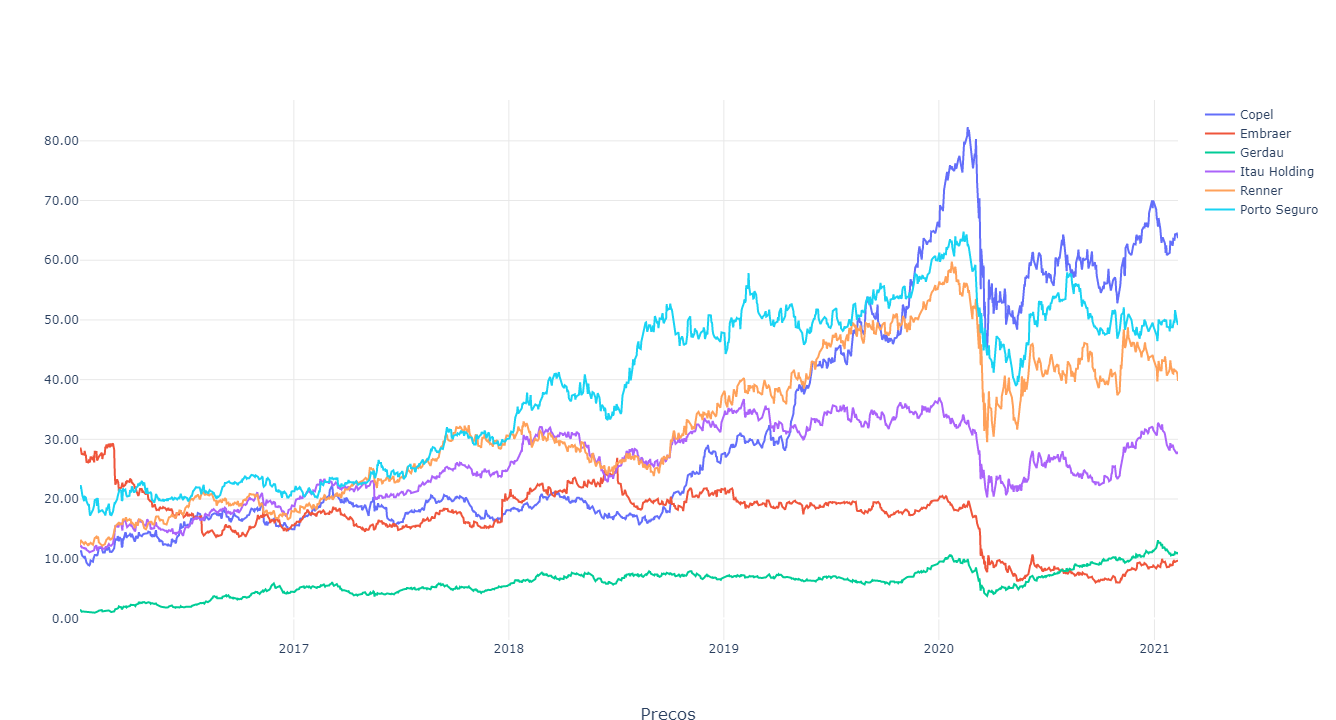

In [9]:
SeriePrecos = plg.Figure()
SeriePrecos.add_trace(plg.Scatter(x=Dados.index, y=Dados["CPLE3.SA"], name="Copel", mode="lines"))
SeriePrecos.add_trace(plg.Scatter(x=Dados.index, y=Dados["EMBR3.SA"], name="Embraer", mode="lines"))
SeriePrecos.add_trace(plg.Scatter(x=Dados.index, y=Dados["GOAU4.SA"], name="Gerdau", mode="lines"))
SeriePrecos.add_trace(plg.Scatter(x=Dados.index, y=Dados["ITUB4.SA"], name="Itau Holding", mode="lines"))
SeriePrecos.add_trace(plg.Scatter(x=Dados.index, y=Dados["LREN3.SA"], name="Renner", mode="lines"))
SeriePrecos.add_trace(plg.Scatter(x=Dados.index, y=Dados["PSSA3.SA"], name="Porto Seguro", mode="lines"))
SeriePrecos.update_layout(yaxis_tickformat=".2f")
Plot_Show(SeriePrecos, "Preços")

### Cálculo e análise descritiva dos Retornos
- Retorno Médio do Ativo (Média).
- Risco do Ativo (Desvio Padrão).
- Maior perda do período (Mínimo).
- Maior ganho no período (Máximo).
- Quartis do Risco.

In [10]:
RetornoDosAtivos = Dados.pct_change().fillna(0)

In [11]:
RetornoDosAtivos

Symbols     ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA
Date                                                                  
2016-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2016-01-05  0.008357 -0.003268  0.071208  0.000000  0.030388 -0.081250
2016-01-06 -0.003946  0.002623 -0.005780 -0.014325 -0.018983 -0.129252
2016-01-07 -0.019018 -0.048398 -0.016279 -0.021799 -0.041119 -0.062500
2016-01-08  0.000404 -0.022681 -0.002364  0.003537 -0.018739  0.041667
...              ...       ...       ...       ...       ...       ...
2021-02-04 -0.004237 -0.003935 -0.011950 -0.019710 -0.006620 -0.018484
2021-02-05 -0.007801  0.016593  0.006289  0.001058  0.043013  0.044256
2021-02-08 -0.015011  0.002021 -0.008654  0.017970 -0.034656 -0.016231
2021-02-09  0.011974 -0.008688 -0.008487  0.000000 -0.008424  0.014665
2021-02-10 -0.007171 -0.003130 -0.027635  0.004154 -0.005866 -0.027100

[1269 rows x 6 columns]

In [12]:
RetornoDosAtivos.describe()

Symbols     ITUB4.SA     CPLE3.SA     LREN3.SA     EMBR3.SA     PSSA3.SA  \
count    1269.000000  1269.000000  1269.000000  1269.000000  1269.000000   
mean        0.000880     0.001668     0.001243    -0.000415     0.000853   
std         0.021217     0.024498     0.025018     0.029380     0.020361   
min        -0.120466    -0.143902    -0.211201    -0.264416    -0.118087   
25%        -0.010870    -0.010460    -0.011628    -0.012757    -0.010483   
50%         0.000301     0.000637     0.000555     0.000000     0.000769   
75%         0.012182     0.015348     0.014049     0.011863     0.012473   
max         0.110593     0.129520     0.150000     0.224985     0.100038   

Symbols     GOAU4.SA  
count    1269.000000  
mean        0.002195  
std         0.035520  
min        -0.212730  
25%        -0.015919  
50%         0.000000  
75%         0.021739  
max         0.206383

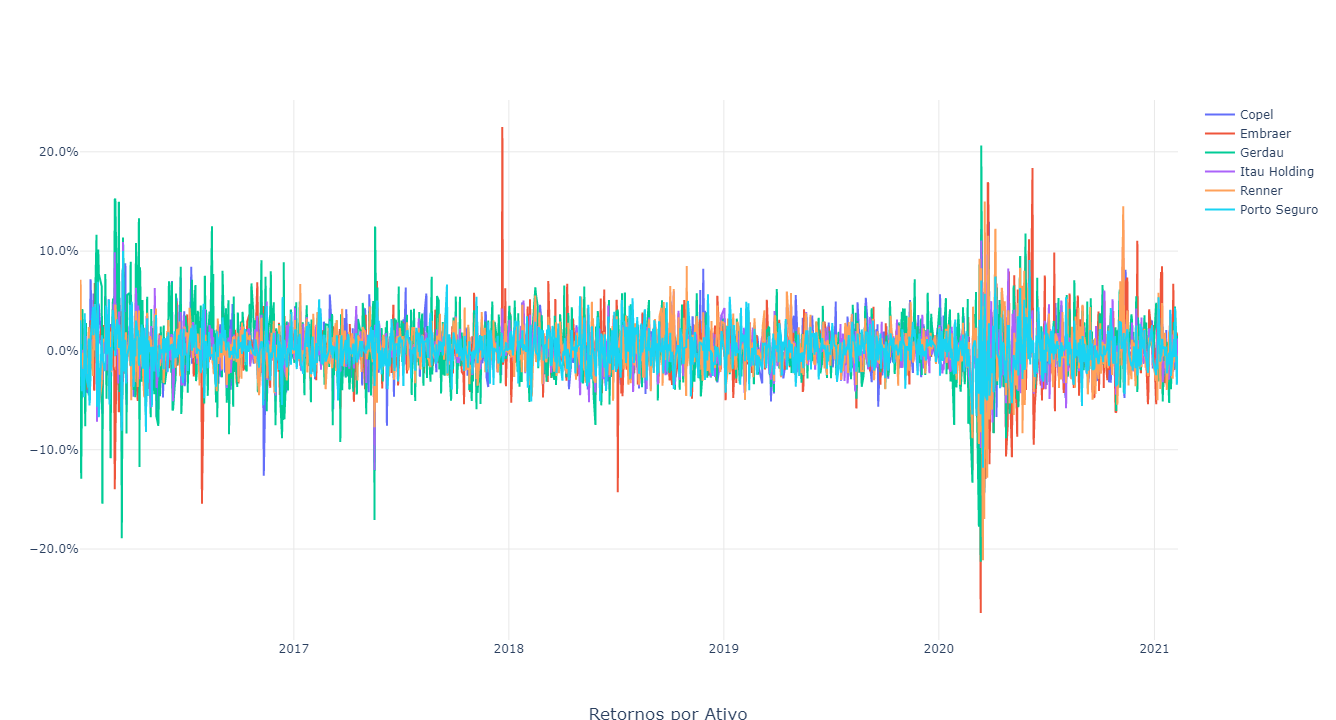

In [13]:
SerieRetornos = plg.Figure()
SerieRetornos.add_trace(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["CPLE3.SA"], name="Copel", mode="lines"))
SerieRetornos.add_trace(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["EMBR3.SA"], name="Embraer", mode="lines"))
SerieRetornos.add_trace(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["GOAU4.SA"], name="Gerdau", mode="lines"))
SerieRetornos.add_trace(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["ITUB4.SA"], name="Itau Holding", mode="lines"))
SerieRetornos.add_trace(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["LREN3.SA"], name="Renner", mode="lines"))
SerieRetornos.add_trace(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["PSSA3.SA"], name="Porto Seguro", mode="lines"))
SerieRetornos.update_layout(yaxis_tickformat=".1%")
Plot_Show(SerieRetornos, "Retornos por Ativo")

- Análise Risco vs Retorno dos Ativos

In [14]:
DadosRiscoRetorno = RetornoDosAtivos.describe().transpose()

In [15]:
DadosRiscoRetorno.columns = ["Dias", "RetornoMedio", "Risco", "Minimo", "p25", "p50", "p75", "Maximo"]

In [16]:
DadosRiscoRetorno

Dias  RetornoMedio     Risco    Minimo       p25       p50  \
Symbols                                                                  
ITUB4.SA  1269.0      0.000880  0.021217 -0.120466 -0.010870  0.000301   
CPLE3.SA  1269.0      0.001668  0.024498 -0.143902 -0.010460  0.000637   
LREN3.SA  1269.0      0.001243  0.025018 -0.211201 -0.011628  0.000555   
EMBR3.SA  1269.0     -0.000415  0.029380 -0.264416 -0.012757  0.000000   
PSSA3.SA  1269.0      0.000853  0.020361 -0.118087 -0.010483  0.000769   
GOAU4.SA  1269.0      0.002195  0.035520 -0.212730 -0.015919  0.000000   

               p75    Maximo  
Symbols                       
ITUB4.SA  0.012182  0.110593  
CPLE3.SA  0.015348  0.129520  
LREN3.SA  0.014049  0.150000  
EMBR3.SA  0.011863  0.224985  
PSSA3.SA  0.012473  0.100038  
GOAU4.SA  0.021739  0.206383

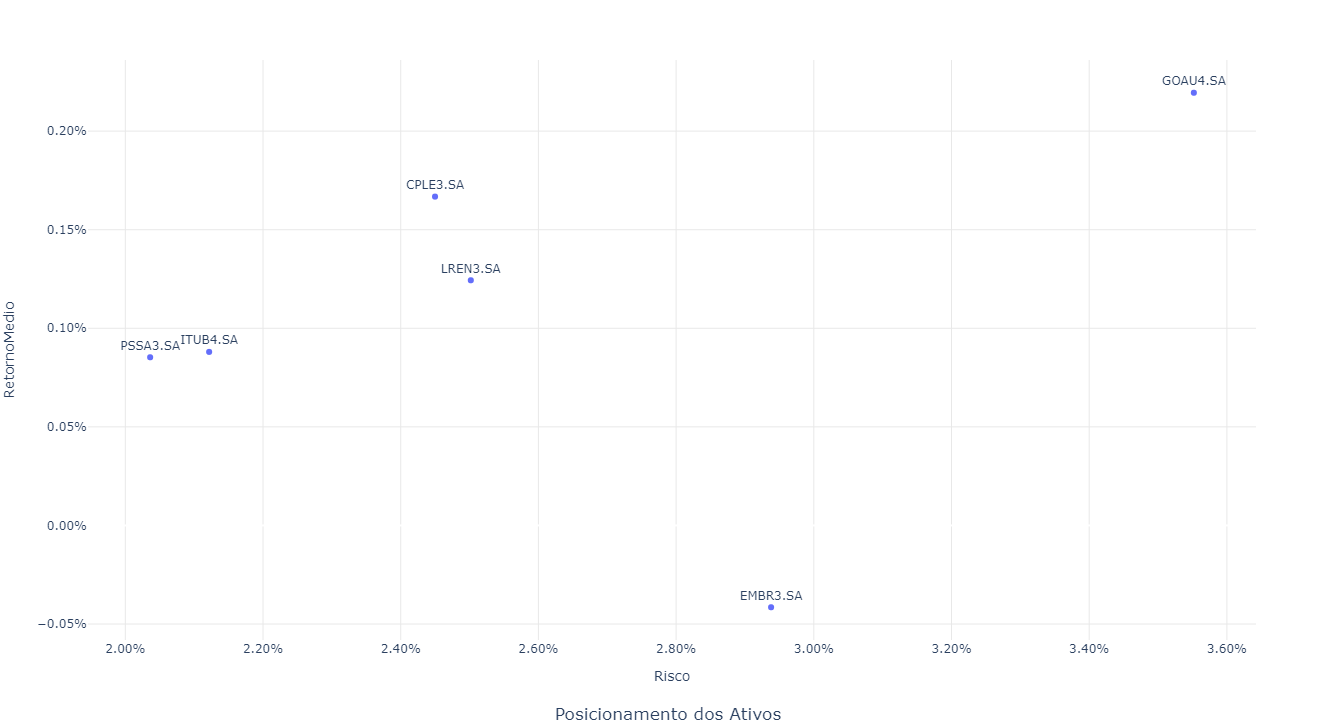

In [17]:
RiscoRetorno = plg.Figure(plx.scatter(DadosRiscoRetorno, x="Risco", y="RetornoMedio", text=DadosRiscoRetorno.index))
RiscoRetorno.update_layout(xaxis_tickformat=".2%", yaxis_tickformat=".2%")
RiscoRetorno.update_traces(textposition="top center")
Plot_Show(RiscoRetorno, "Posicionamento dos Ativos")

### Retorno Acumulado por Ativo
Calcula dia-a-dia o retorno acumulado de cada ativo, sem ponderação da distribuição do portfólio, apenas usando o período.

In [18]:
RetornoAcumuladoDosAtivos = (1+RetornoDosAtivos).cumprod()-1

In [19]:
RetornoAcumuladoDosAtivos

Symbols     ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA
Date                                                                  
2016-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2016-01-05  0.008357 -0.003268  0.071208  0.000000  0.030388 -0.081250
2016-01-06  0.004377 -0.000654  0.065016 -0.014325  0.010828 -0.200000
2016-01-07 -0.014724 -0.049020  0.047678 -0.035812 -0.030737 -0.250000
2016-01-08 -0.014325 -0.070588  0.045201 -0.032401 -0.048900 -0.218750
...              ...       ...       ...       ...       ...       ...
2021-02-04  1.339219  4.617930  2.376186 -0.668002  1.285240  6.122604
2021-02-05  1.320970  4.711149  2.397419 -0.667651  1.383534  6.437823
2021-02-08  1.286130  4.722690  2.368019 -0.661678  1.300930  6.317101
2021-02-09  1.313504  4.672974  2.339435 -0.661678  1.281548  6.424409
2021-02-10  1.296914  4.655218  2.247149 -0.660273  1.268165  6.223206

[1269 rows x 6 columns]

Retorno Acumulado de cada ativo

In [20]:
RetornoAcumuladoDosAtivos[-1:]

Symbols     ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA
Date                                                                  
2021-02-10  1.296914  4.655218  2.247149 -0.660273  1.268165  6.223206

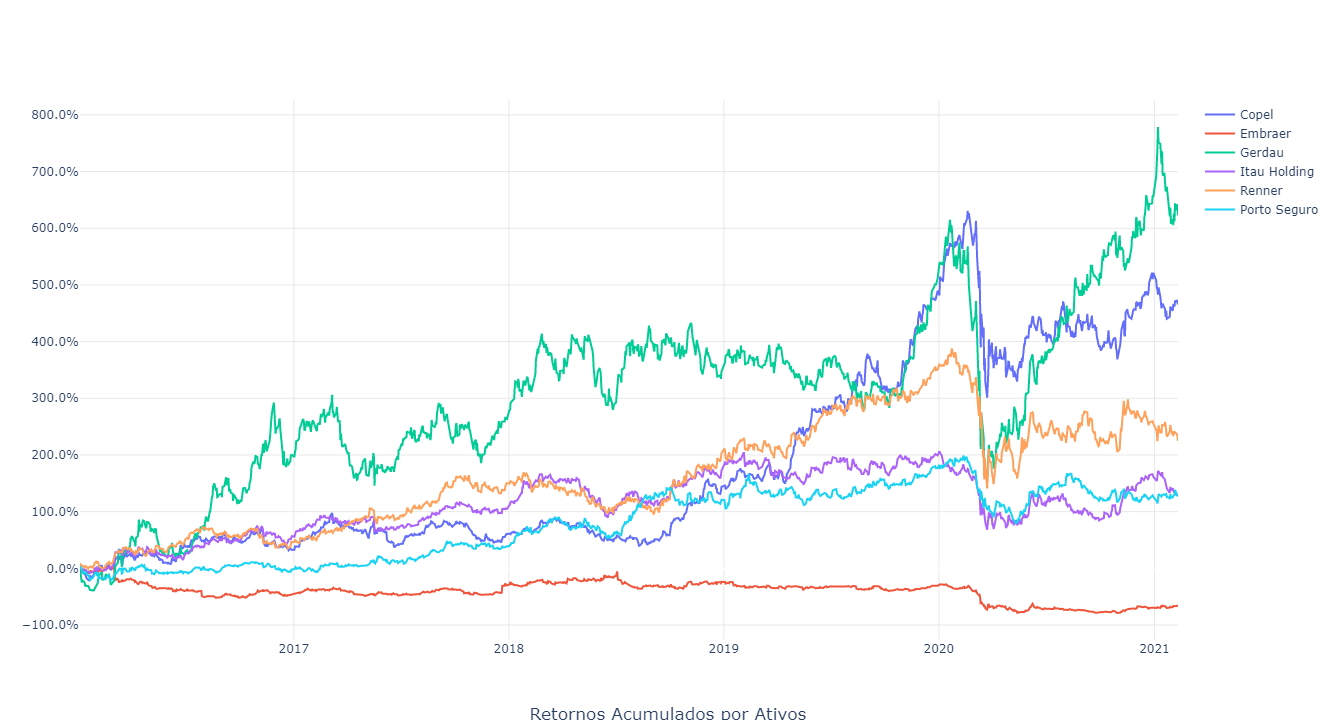

In [21]:
SerieRetornosAcum = plg.Figure()
SerieRetornosAcum.add_trace(plg.Scatter(x=RetornoAcumuladoDosAtivos.index, y=RetornoAcumuladoDosAtivos["CPLE3.SA"], name="Copel", mode="lines"))
SerieRetornosAcum.add_trace(plg.Scatter(x=RetornoAcumuladoDosAtivos.index, y=RetornoAcumuladoDosAtivos["EMBR3.SA"], name="Embraer", mode="lines"))
SerieRetornosAcum.add_trace(plg.Scatter(x=RetornoAcumuladoDosAtivos.index, y=RetornoAcumuladoDosAtivos["GOAU4.SA"], name="Gerdau", mode="lines"))
SerieRetornosAcum.add_trace(plg.Scatter(x=RetornoAcumuladoDosAtivos.index, y=RetornoAcumuladoDosAtivos["ITUB4.SA"], name="Itau Holding", mode="lines"))
SerieRetornosAcum.add_trace(plg.Scatter(x=RetornoAcumuladoDosAtivos.index, y=RetornoAcumuladoDosAtivos["LREN3.SA"], name="Renner", mode="lines"))
SerieRetornosAcum.add_trace(plg.Scatter(x=RetornoAcumuladoDosAtivos.index, y=RetornoAcumuladoDosAtivos["PSSA3.SA"], name="Porto Seguro", mode="lines"))
SerieRetornosAcum.update_layout(yaxis_tickformat=".1%")
Plot_Show(SerieRetornosAcum, "Retornos Acumulados por Ativos")

### Indicadores de cada Ativo

- Retorno Médio (%)

In [22]:
RetornoMedioDosAtivos = RetornoDosAtivos.mean()
np.round(RetornoMedioDosAtivos * 100, 2)

Symbols
ITUB4.SA    0.09
CPLE3.SA    0.17
LREN3.SA    0.12
EMBR3.SA   -0.04
PSSA3.SA    0.09
GOAU4.SA    0.22
dtype: float64

- Retorno Acumulado

In [23]:
RetornoAcumulado = RetornoAcumuladoDosAtivos[-1:].transpose()
RetornoAcumulado.columns = ["Last"]

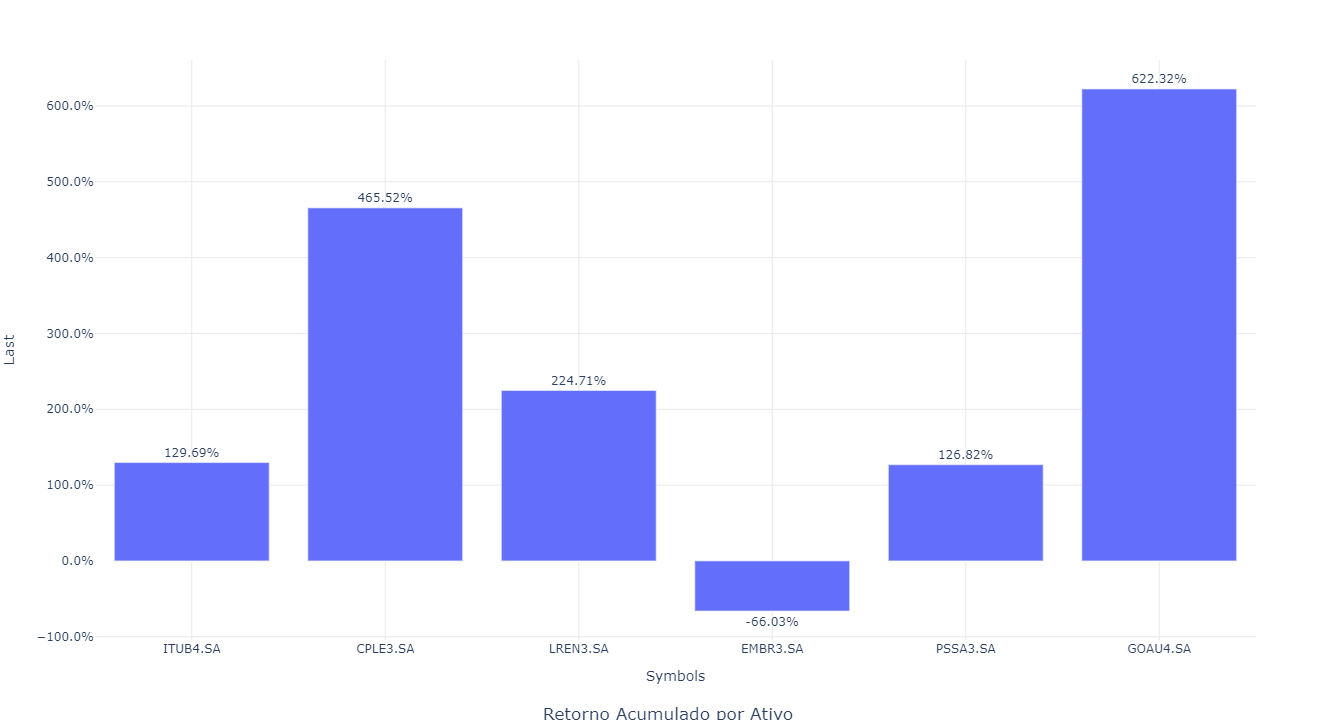

In [24]:
SerieRetornoAcumulado = plg.Figure(plx.bar(RetornoAcumulado, x=RetornoAcumulado.index, y="Last", text="Last"))
SerieRetornoAcumulado.update_layout(yaxis_tickformat=".1%")
SerieRetornoAcumulado.update_traces(texttemplate='%{text:.2%}', textposition='outside')
Plot_Show(SerieRetornoAcumulado, "Retorno Acumulado por Ativo")

- Risco (%)

In [25]:
RiscoDosAtivos = RetornoDosAtivos.std()
np.round(RiscoDosAtivos * 100, 2)

Symbols
ITUB4.SA    2.12
CPLE3.SA    2.45
LREN3.SA    2.50
EMBR3.SA    2.94
PSSA3.SA    2.04
GOAU4.SA    3.55
dtype: float64

- Performance (Sharpe %)

In [26]:
SharpeDosAtivos = RetornoMedioDosAtivos / RiscoDosAtivos
np.round(SharpeDosAtivos * 100, 2)

Symbols
ITUB4.SA    4.15
CPLE3.SA    6.81
LREN3.SA    4.97
EMBR3.SA   -1.41
PSSA3.SA    4.19
GOAU4.SA    6.18
dtype: float64

### Retorno Acumulado do Portfólio
Calcula dia-a-dia os retornos e retorno acumulado do portfólio, conforme distribuição nos ativos.

- Retorno dia-a-dia do portfólio

In [27]:
RetornosDoPortfolio = Portfolio.transpose().dot(RetornoDosAtivos.transpose()).transpose()

In [28]:
RetornoDosAtivos["Portfolio"] = RetornosDoPortfolio["Pesos"]

In [29]:
RetornoDosAtivos

Symbols     ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA  \
Date                                                                     
2016-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2016-01-05  0.008357 -0.003268  0.071208  0.000000  0.030388 -0.081250   
2016-01-06 -0.003946  0.002623 -0.005780 -0.014325 -0.018983 -0.129252   
2016-01-07 -0.019018 -0.048398 -0.016279 -0.021799 -0.041119 -0.062500   
2016-01-08  0.000404 -0.022681 -0.002364  0.003537 -0.018739  0.041667   
...              ...       ...       ...       ...       ...       ...   
2021-02-04 -0.004237 -0.003935 -0.011950 -0.019710 -0.006620 -0.018484   
2021-02-05 -0.007801  0.016593  0.006289  0.001058  0.043013  0.044256   
2021-02-08 -0.015011  0.002021 -0.008654  0.017970 -0.034656 -0.016231   
2021-02-09  0.011974 -0.008688 -0.008487  0.000000 -0.008424  0.014665   
2021-02-10 -0.007171 -0.003130 -0.027635  0.004154 -0.005866 -0.027100   

Symbols     Portfolio  
Date                   
2016-01-04   0.000000  
2016-01-05  -0.006913  
2016-01-06  -0.043132  
2016-01-07  -0.039879  
2016-01-08   0.006011  
...               ...  
2021-02-04  -0.011779  
2021-02-05   0.021480  
2021-02-08  -0.009366  
2021-02-09   0.001320  
2021-02-10  -0.015171  

[1269 rows x 7 columns]

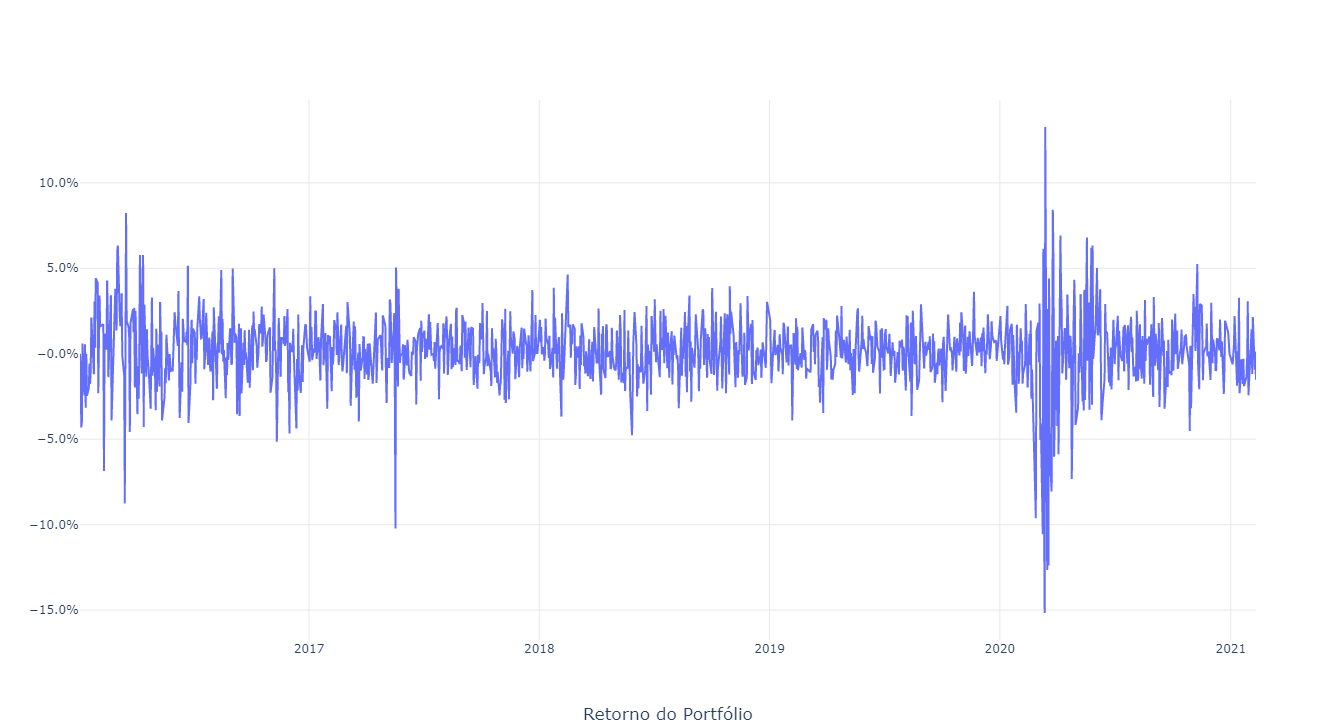

In [30]:
SerieRetornos = plg.Figure(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["Portfolio"], name="Portfólio", mode="lines"))
SerieRetornos.update_layout(yaxis_tickformat=".1%")
Plot_Show(SerieRetornos, "Retorno do Portfólio")

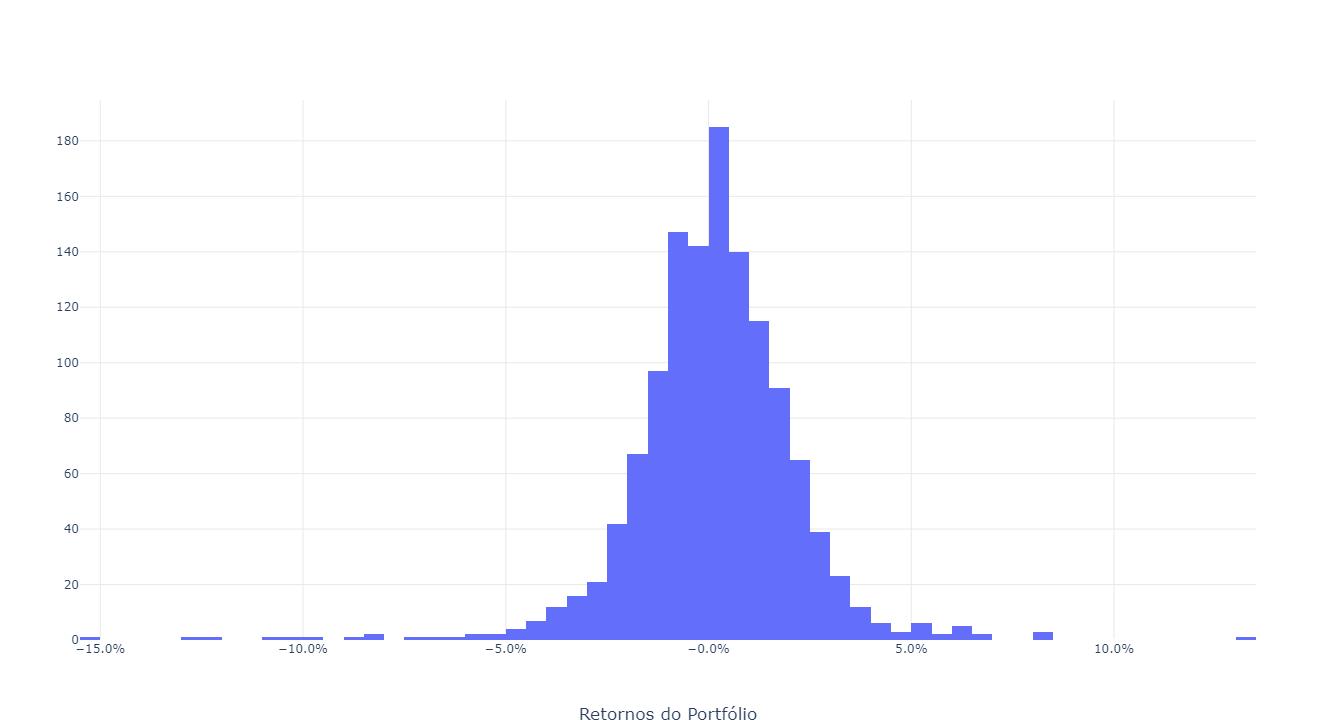

In [31]:
HistogramaRetornos = plg.Figure(plg.Histogram(x=RetornoDosAtivos["Portfolio"]))
HistogramaRetornos.update_layout(xaxis_tickformat=".1%")
Plot_Show(HistogramaRetornos, "Retornos do Portfólio")

- Retorno acumulado do portfólio

In [32]:
RetornoDosAtivos["Acumulado"] = (1+RetornoDosAtivos["Portfolio"]).cumprod()-1

In [33]:
RetornoDosAtivos

Symbols     ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA  \
Date                                                                     
2016-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2016-01-05  0.008357 -0.003268  0.071208  0.000000  0.030388 -0.081250   
2016-01-06 -0.003946  0.002623 -0.005780 -0.014325 -0.018983 -0.129252   
2016-01-07 -0.019018 -0.048398 -0.016279 -0.021799 -0.041119 -0.062500   
2016-01-08  0.000404 -0.022681 -0.002364  0.003537 -0.018739  0.041667   
...              ...       ...       ...       ...       ...       ...   
2021-02-04 -0.004237 -0.003935 -0.011950 -0.019710 -0.006620 -0.018484   
2021-02-05 -0.007801  0.016593  0.006289  0.001058  0.043013  0.044256   
2021-02-08 -0.015011  0.002021 -0.008654  0.017970 -0.034656 -0.016231   
2021-02-09  0.011974 -0.008688 -0.008487  0.000000 -0.008424  0.014665   
2021-02-10 -0.007171 -0.003130 -0.027635  0.004154 -0.005866 -0.027100   

Symbols     Portfolio  Acumulado  
Date                              
2016-01-04   0.000000   0.000000  
2016-01-05  -0.006913  -0.006913  
2016-01-06  -0.043132  -0.049747  
2016-01-07  -0.039879  -0.087642  
2016-01-08   0.006011  -0.082157  
...               ...        ...  
2021-02-04  -0.011779   3.366179  
2021-02-05   0.021480   3.459966  
2021-02-08  -0.009366   3.418196  
2021-02-09   0.001320   3.424027  
2021-02-10  -0.015171   3.356909  

[1269 rows x 8 columns]

In [34]:
RetornoDosAtivos[-1:]

Symbols     ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA  \
Date                                                                     
2021-02-10 -0.007171  -0.00313 -0.027635  0.004154 -0.005866   -0.0271   

Symbols     Portfolio  Acumulado  
Date                              
2021-02-10  -0.015171   3.356909

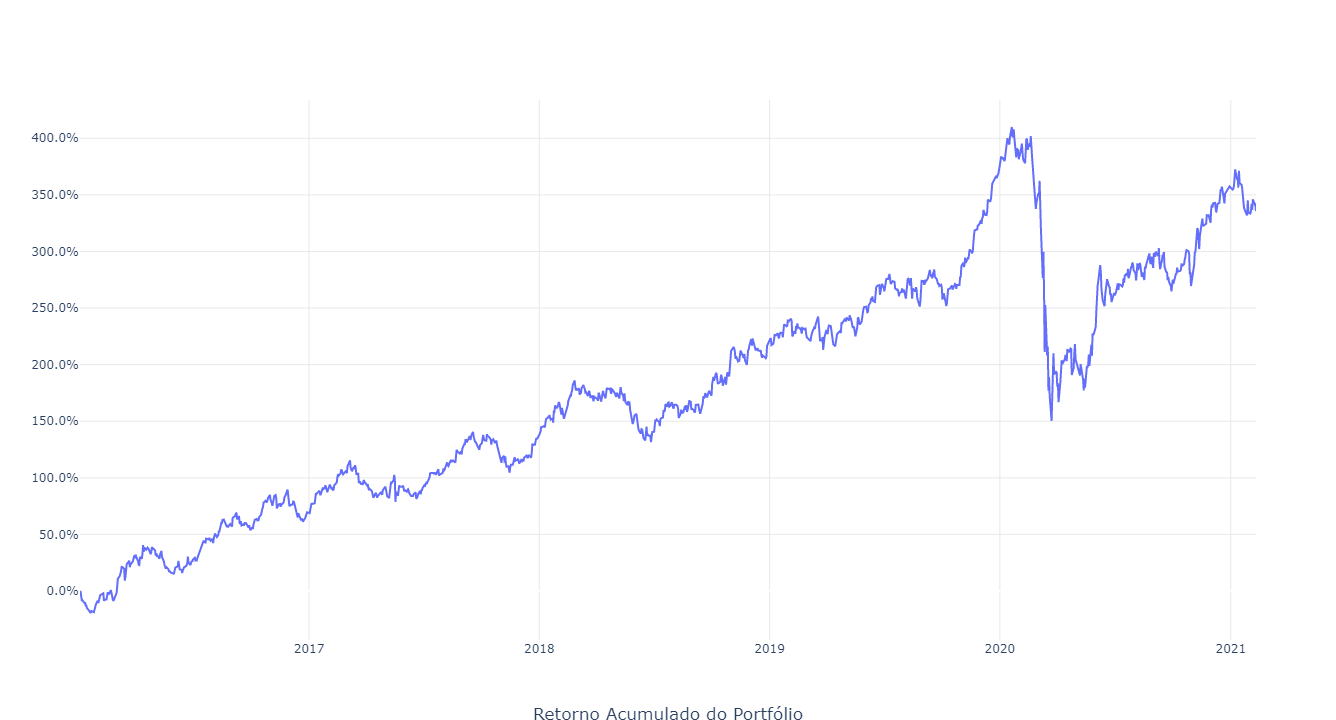

In [35]:
SerieRetornos = plg.Figure(plg.Scatter(x=RetornoDosAtivos.index, y=RetornoDosAtivos["Acumulado"], name="Portfólio", mode="lines"))
SerieRetornos.update_layout(yaxis_tickformat=".1%")
Plot_Show(SerieRetornos, "Retorno Acumulado do Portfólio")

### Indicadores do Portfólio

- Retorno Médio

In [36]:
RetornoMedio = RetornoDosAtivos["Portfolio"].mean()
print("Retorno Médio: {0:.2%}".format(RetornoMedio))

Retorno Médio: 0.14%


- Retorno Acumulado

In [37]:
RetornoAcumulado = RetornoDosAtivos["Acumulado"][-1]
print("Retorno Acumulado: {0:.2%}".format(RetornoAcumulado))

Retorno Acumulado: 335.69%


- Risco

In [38]:
Risco = RetornoDosAtivos["Portfolio"].std()
print("Risco: {0:.2%}".format(Risco))

Risco: 2.05%


- Performance (Sharpe)

In [39]:
Sharpe = RetornoMedio / Risco
print("Performance Sharpe: {0:.2%}".format(Sharpe))

Performance Sharpe: 6.70%


- VaR Histórico

In [40]:
InvestimentoPrevisto = 10000

In [41]:
VarHistorico = np.quantile(RetornoDosAtivos["Portfolio"], 0.05)
VarHistoricoPeriodos = np.sqrt([1,7,14,21]) * VarHistorico

PerdaMaxima = InvestimentoPrevisto * VarHistoricoPeriodos

print("VaR 1 dia: {0:.2%}, Perda máxima de {1:.2f}".format(VarHistoricoPeriodos[0], PerdaMaxima[0]))
print("VaR 7 dias: {0:.2%}, Perda máxima de {1:.2f}".format(VarHistoricoPeriodos[1], PerdaMaxima[1]))
print("VaR 14 dias: {0:.2%}, Perda máxima de {1:.2f}".format(VarHistoricoPeriodos[2], PerdaMaxima[2]))
print("VaR 21 dias: {0:.2%}, Perda máxima de {1:.2f}".format(VarHistoricoPeriodos[3], PerdaMaxima[3]))

VaR 1 dia: -2.76%, Perda máxima de -276.34
VaR 7 dias: -7.31%, Perda máxima de -731.13
VaR 14 dias: -10.34%, Perda máxima de -1033.98
VaR 21 dias: -12.66%, Perda máxima de -1266.36


- VaR Paramétrico

In [42]:
VarParam = RetornoMedio - norm.ppf(0.95) * Risco
VarParamPeriodos = np.sqrt([1,7,14,21]) * VarParam

PerdaMaxima = InvestimentoPrevisto * VarParamPeriodos

print("VaR 1 dia: {0:.2%}, Perda máxima de {1:.2f}".format(VarParamPeriodos[0], PerdaMaxima[0]))
print("VaR 7 dias: {0:.2%}, Perda máxima de {1:.2f}".format(VarParamPeriodos[1], PerdaMaxima[1]))
print("VaR 14 dias: {0:.2%}, Perda máxima de {1:.2f}".format(VarParamPeriodos[2], PerdaMaxima[2]))
print("VaR 21 dias: {0:.2%}, Perda máxima de {1:.2f}".format(VarParamPeriodos[3], PerdaMaxima[3]))

VaR 1 dia: -3.23%, Perda máxima de -323.26
VaR 7 dias: -8.55%, Perda máxima de -855.26
VaR 14 dias: -12.10%, Perda máxima de -1209.52
VaR 21 dias: -14.81%, Perda máxima de -1481.36
